# What is Hierarchical Clustering?

Hierarchical clustering groups similar objects into a dendrogram. It merges similar clusters iteratively, starting with each data point as a separate cluster. This creates a tree-like structure that shows the relationships between clusters and their hierarchy.

The dendrogram from hierarchical clustering reveals the hierarchy of clusters at different levels, highlighting natural groupings in the data. It provides a visual representation of the relationships between clusters, helping to identify patterns and outliers, making it a useful tool for exploratory data analysis. 

Let’s say we have the below points and we want to cluster them into groups:

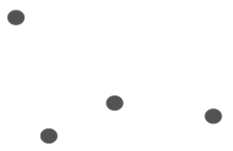

We can assign each of these points to a separate cluster:

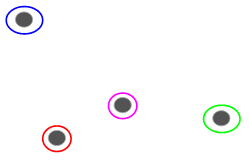

Now, based on the similarity of these clusters, we can combine the most similar clusters together and repeat this process until only a single cluster is left:

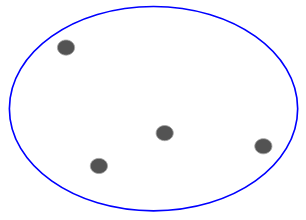

We are essentially building a hierarchy of clusters. That’s why this algorithm is called hierarchical clustering. I will discuss how to decide the number of clusters in a later section. For now, let’s look at the different types of hierarchical clustering.

# Types of Hierarchical Clustering

There are mainly two types of hierarchical clustering:

1. Agglomerative hierarchical clustering
2. Divisive Hierarchical clustering

# Agglomerative Hierarchical Clustering

We assign each point to an individual cluster in this technique. Suppose there are 4 data points. We will assign each of these points to a cluster and hence will have 4 clusters in the beginning:

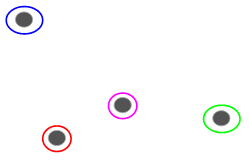

Then, at each iteration, we merge the closest pair of clusters and repeat this step until only a single cluster is left:

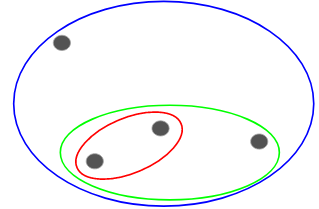

We are merging (or adding) the clusters at each step, right? Hence, this type of clustering is also known as additive hierarchical clustering.

# Divisive Hierarchical Clustering

Divisive hierarchical clustering works in the opposite way. Instead of starting with n clusters (in case of n observations), we start with a single cluster and assign all the points to that cluster.

So, it doesn’t matter if we have 10 or 1000 data points. All these points will belong to the same cluster at the beginning:

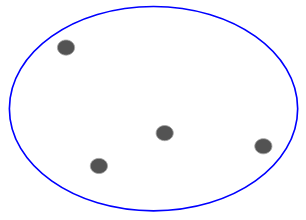

Now, at each iteration, we split the farthest point in the cluster and repeat this process until each cluster only contains a single point:

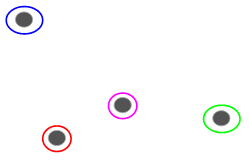

We are splitting (or dividing) the clusters at each step, hence the name divisive hierarchical clustering.

# Steps to Perform Hierarchical Clustering

We merge the most similar points or clusters in hierarchical clustering – we know this. Now the question is – how do we decide which points are similar and which are not? It’s one of the most important questions in clustering!

Here’s one way to calculate similarity – Take the distance between the centroids of these clusters. The points having the least distance are referred to as similar points and we can merge them. We can refer to this as a distance-based algorithm as well (since we are calculating the distances between the clusters).

In hierarchical clustering, we have a concept called a proximity matrix. This stores the distances between each point. Let’s take an example to understand this matrix as well as the steps to perform hierarchical clustering.

Suppose a teacher wants to divide her students into different groups. She has the marks scored by each student in an assignment and based on these marks, she wants to segment them into groups. There’s no fixed target here as to how many groups to have. Since the teacher does not know what type of students should be assigned to which group, it cannot be solved as a unsupervised learning problem. So, we will try to apply hierarchical clustering here and segment the students into different groups.

Let’s take a sample of 5 students:

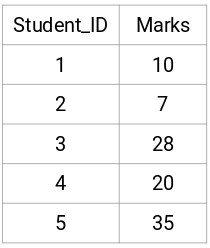

# Creating a Proximity Matrix

First, we will create a proximity matrix which will tell us the distance between each of these points. Since we are calculating the distance of each point from each of the other points, we will get a square matrix of shape n X n (where n is the number of observations).

Let’s make the 5 x 5 proximity matrix for our example:

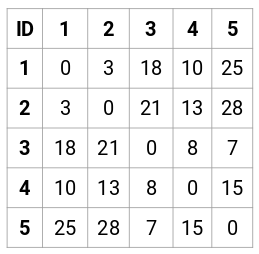

The diagonal elements of this matrix will always be 0 as the distance of a point with itself is always 0. We will use the Euclidean distance formula to calculate the rest of the distances. So, let’s say we want to calculate the distance between point 1 and 2:

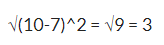

Similarly, we can calculate all the distances and fill the proximity matrix.

# Steps to Perform Hierarchical Clustering

# Step 1: First, we assign all the points to an individual cluster:

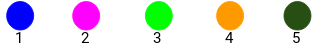

Different colors here represent different clusters. You can see that we have 5 different clusters for the 5 points in our data.

# Step 2: Next, we will look at the smallest distance in the proximity matrix and merge the points with the smallest distance. We then update the proximity matrix:

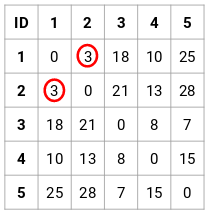

Here, the smallest distance is 3 and hence we will merge point 1 and 2:

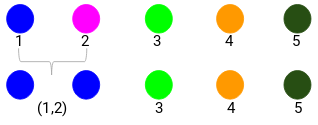

Let’s look at the updated clusters and accordingly update the proximity matrix:

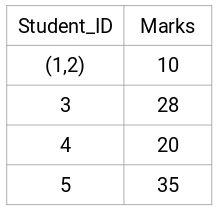

Here, we have taken the maximum of the two marks (7, 10) to replace the marks for this cluster. Instead of the maximum, we can also take the minimum value or the average values as well. Now, we will again calculate the proximity matrix for these clusters:

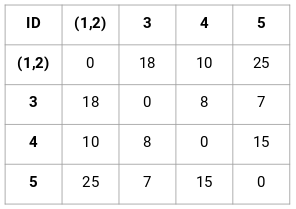

# Step 3: We will repeat step 2 until only a single cluster is left.

So, we will first look at the minimum distance in the proximity matrix and then merge the closest pair of clusters. We will get the merged clusters as shown below after repeating these steps:

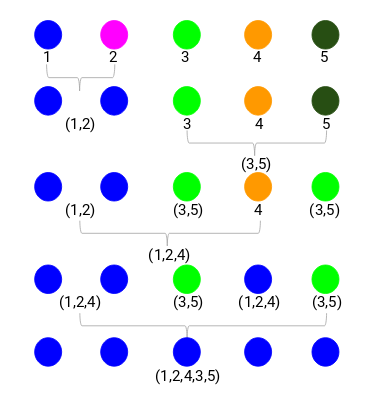

We started with 5 clusters and finally have a single cluster. This is how agglomerative hierarchical clustering works. But the burning question still remains – how do we decide the number of clusters? Let’s understand that in the next section.

# How should we Choose the Number of Clusters in Hierarchical Clustering?

To get the number of clusters for hierarchical clustering, we make use of an awesome concept called a Dendrogram.

A dendrogram is a tree-like diagram that records the sequences of merges or splits.

Let’s get back to our teacher-student example. Whenever we merge two clusters, a dendrogram will record the distance between these clusters and represent it in graph form. Let’s see how a dendrogram looks like:

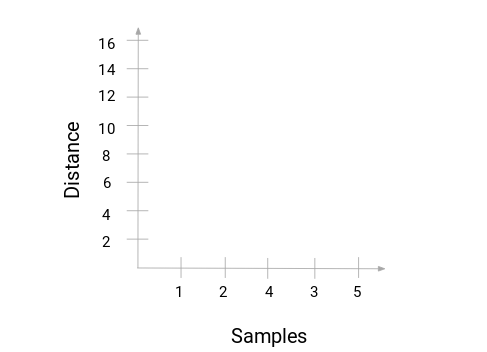

We have the samples of the dataset on the x-axis and the distance on the y-axis. Whenever two clusters are merged, we will join them in this dendrogram and the height of the join will be the distance between these points. Let’s build the dendrogram for our example:

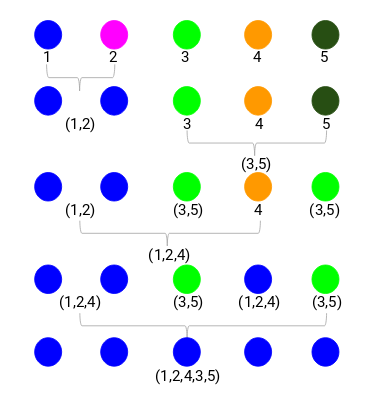

Take a moment to process the above image. We started by merging sample 1 and 2 and the distance between these two samples was 3 (refer to the first proximity matrix in the previous section). Let’s plot this in the dendrogram:



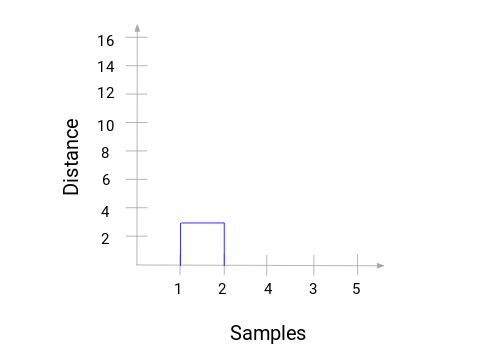

Here, we can see that we have merged sample 1 and 2. The vertical line represents the distance between these samples. Similarly, we plot all the steps where we merged the clusters and finally, we get a dendrogram like this:

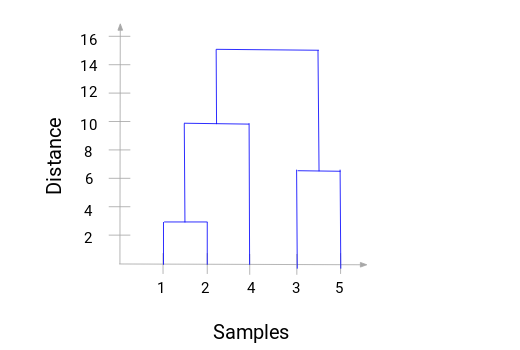

We can clearly visualize the steps of hierarchical clustering. More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

Now, we can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line). Let’s set this threshold as 12 and draw a horizontal line:

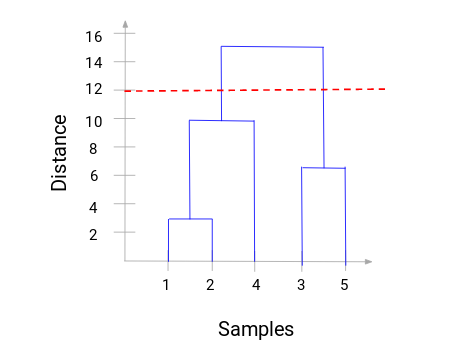

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. In the above example, since the red line intersects 2 vertical lines, we will have 2 clusters. One cluster will have a sample (1,2,4) and the other will have a sample (3,5). Pretty straightforward, right?

This is how we can decide the number of clusters using a dendrogram in Hierarchical Clustering.

In [3]:
# Hierarchical Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Customers.csv')
X = dataset.iloc[:, [3, 4]].values




In [4]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


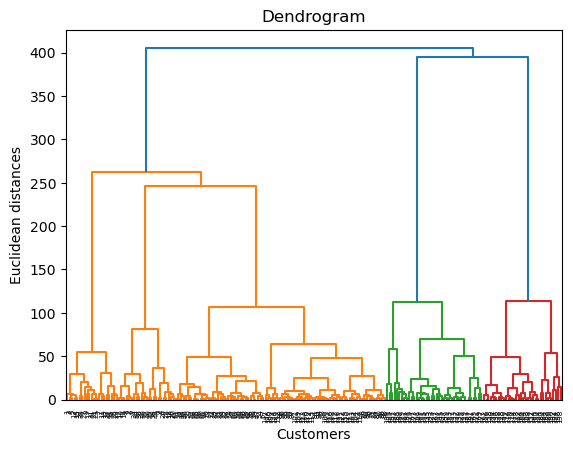

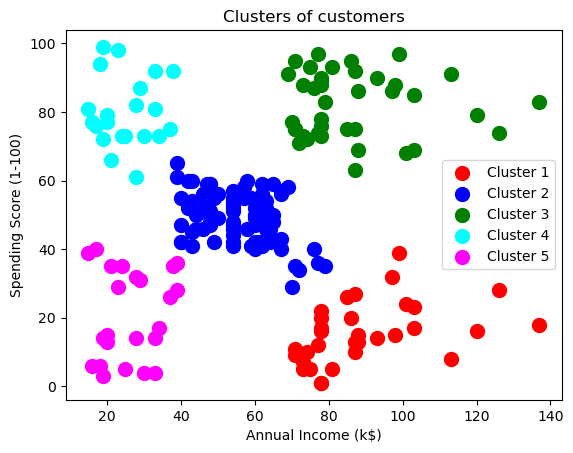

In [5]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [6]:
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


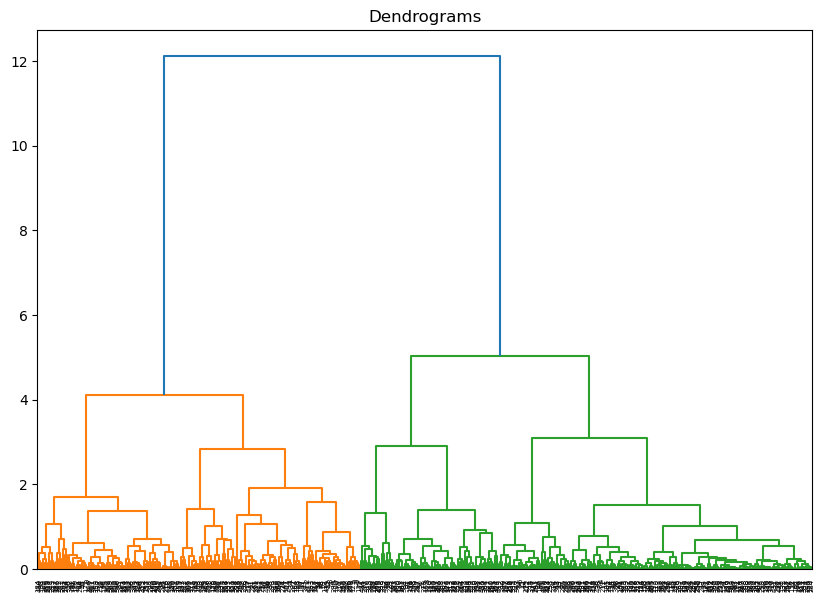

In [8]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

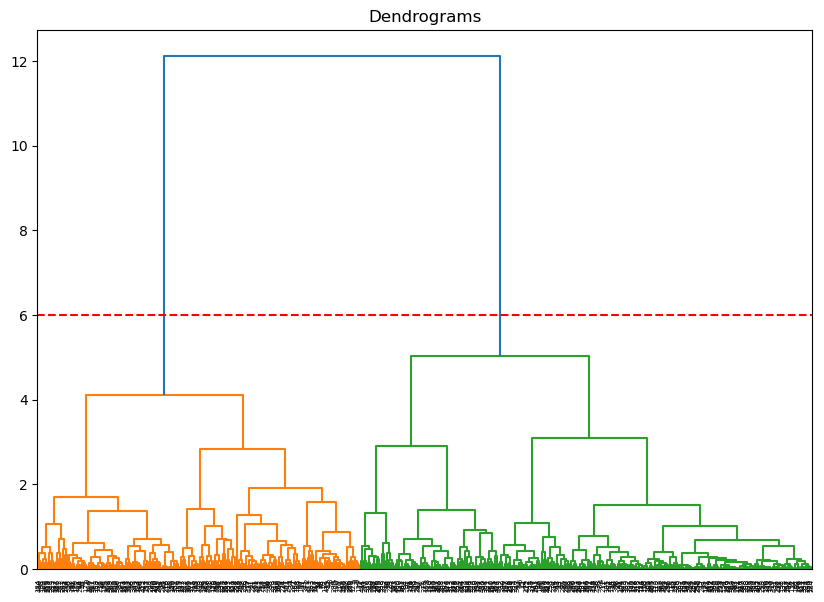

In [9]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [10]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

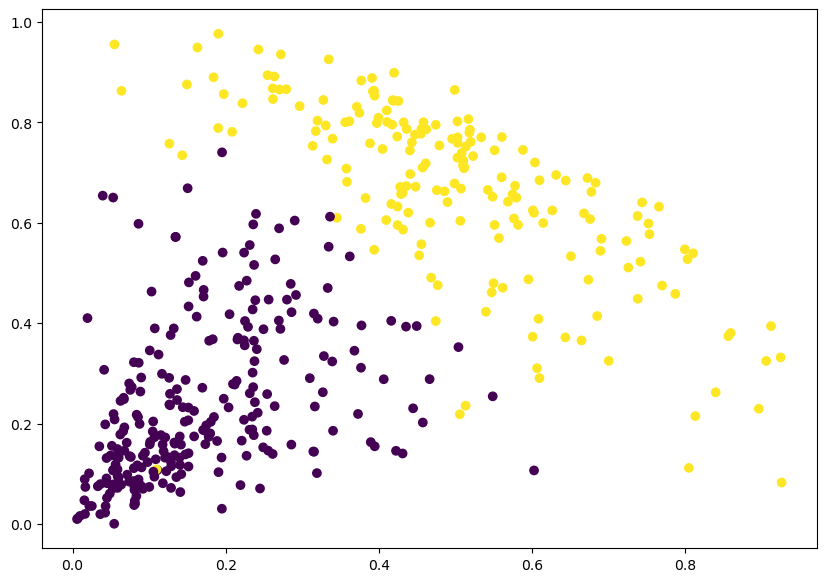

In [11]:

plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 